In [1]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
!pip install tensorflow

In [2]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [1]:
import pandas as pd

df = pd.read_csv('tweets.csv')

In [2]:
raw_text = df['text']

In [3]:
Y = df['label']
Y = [1 if i == "hate" else 0 for i in Y]

In [4]:
### Lower text
def toLower(data):
    res = []
    for sentence in data:
        res.append(str.lower(sentence))
    return res

In [5]:
cleanset = toLower(raw_text)

In [8]:
# Tokenise
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [10]:

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
  
filtered_sentences = []

# Removing stopwords
for text in cleanset:
    content = []
    for i in word_tokenize(text):
        if i not in stop_words:
            content.append(i)
    filtered_sentences.append(' '.join(content))
    

tokenizer = nltk.RegexpTokenizer(r"\w+")

filtered_sentences_2 = []

# Removing punctuation

for sentence in filtered_sentences:
    new_words = tokenizer.tokenize(sentence)
    filtered_sentences_2.append(' '.join(new_words))


    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
# function to remove numbers
nltk.download('wordnet')
import re

def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)
 
#nltk.download('wordnet')
filtered_sentences_2 = [remove_numbers(sentence) for sentence in filtered_sentences_2]

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

filtered_sentences_2 = [lemmatizer.lemmatize(sentence) for sentence in filtered_sentences_2]
    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utkar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [13]:
filtered_sentences_2[:4]

['legal husband rape wife',
 'dalits lowlife scum',
 'dalits lowlives',
 'better world women dare question men']

In [14]:
filtered_sentences_3 = []

for sentence in filtered_sentences_2:
    wordsToAdd = []
    for word in word_tokenize(sentence):
        if len(word) >= 3 and word.isalnum():
            wordsToAdd.append(word)
    filtered_sentences_3.append(' '.join(wordsToAdd))
    

In [33]:
filtered_sentences_3[:3]

['legal husband rape wife', 'dalits lowlife scum', 'dalits lowlives']

In [15]:
filtered_sentences_3 = [sentence.strip() for sentence in filtered_sentences_3]

In [14]:
filtered_sentences_3[:4]

['legal husband rape wife',
 'dalits lowlife scum',
 'dalits lowlives',
 'better world women dare question']

In [16]:
corpus = filtered_sentences_3

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
def posTagging(sentences):
    final = []
    for sentence in sentences:
        res = []
        tok=nltk.tokenize.word_tokenize(sentence) 
        pos=nltk.pos_tag(tok)
        for token in pos:
            res.append(token[0] + "_" + token[1])
        final.append(' '.join(res))
    return final

In [35]:
tagged_corpus = posTagging(corpus)
print(tagged_corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
vect = CountVectorizer(max_features=20000,ngram_range=(1,1))
vect.fit(corpus)

CountVectorizer(max_features=20000)

In [19]:
size = len(vect.vocabulary_)
size

19646

In [31]:
vect.get_feature_names()

['abbos',
 'abhorrent',
 'ability',
 'able',
 'able get',
 'able take',
 'abnormal',
 'abolish',
 'abolished',
 'abomination',
 'aboriginal',
 'aboriginal people',
 'aboriginals',
 'abortion',
 'abroad',
 'absolute',
 'absolute shit',
 'absolutely',
 'absolutely adore',
 'absolutely adore plan',
 'absolutely fantastic',
 'absolutely fantastic love',
 'absolutely fucking',
 'absolutely hilarious',
 'absolutely love',
 'absolutely love plan',
 'absolutely nothing',
 'absolutely stunning',
 'absolutely stunning turned',
 'absurd',
 'abundance',
 'abuse',
 'abused',
 'abusers',
 'abusive',
 'abysmal',
 'academia',
 'academic',
 'academics',
 'academics therefore',
 'academics therefore experts',
 'accent',
 'accept',
 'accept kinds',
 'accept kinds immigrants',
 'accept others',
 'accept others call',
 'accept people',
 'accept people calling',
 'accept races',
 'accept races equal',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accidentally',
 'accommodation',
 'ac

In [20]:
bag_of_words = vect.transform(corpus)

In [21]:
X = bag_of_words.toarray()

#X_train, X_test, Y_train, Y_test = ne
#print(x)
"""
for i in range(len(x)):
    if x[i] >= 1:
       print("Found one")
"""

'\nfor i in range(len(x)):\n    if x[i] >= 1:\n       print("Found one")\n'

In [60]:
print(bag_of_words[2])

  (0, 4011)	1
  (0, 9811)	1


In [19]:
corpus

['legal husband rape wife',
 'dalits lowlife scum',
 'dalits lowlives',
 'better world women dare question',
 'work hard immigrants take benefits',
 'work hard migrants take benefits',
 'work hard foreigners take benefits',
 'work hard hispanics take benefits',
 'work hard chavs take benefits',
 'work hard pakis take benefits',
 'work hard muslims take benefits',
 'foreigners burden society',
 'immigrants burden society',
 'women burden society',
 'people burden society',
 'people burden society',
 'foreigners smell weird wash',
 'french people smell weird wash',
 'white people smell weird wash',
 'asian people smell weird wash',
 'black people smell weird wash',
 'africans smell weird wash',
 'african people smell weird wash',
 'whites smell weird wash',
 'dikes smell weird wash',
 'welsh people smell weird wash',
 'dont hate hindus',
 'dont hate muslims',
 'dont hatefucking islam',
 'dont hate fucking muslims',
 'world full women unfair',
 'government incompetent',
 'short people som

In [40]:
tk = word_tokenize("Baby we done it")
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
pos_tag(tk)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Rohan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


[('Baby', 'IN'), ('we', 'PRP'), ('done', 'VBN'), ('it', 'PRP')]

### One Hot Representation

In [19]:
import tensorflow as tf

vocab_size = size

onehot_repr = [one_hot(sentence, vocab_size) for words in corpus]

#onehot_repr


### Embedding Representation

In [20]:
sent_length = 15
embedded_docs = pad_sequences(onehot_repr, padding='pre',maxlen=sent_length)


In [21]:
## Model Creation
embedding_vector_features = 60
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=sent_length))
model.add(LSTM(200)) ## 200 neurons
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 60)            1178760   
_________________________________________________________________
lstm (LSTM)                  (None, 200)               208800    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 1,387,761
Trainable params: 1,387,761
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
import numpy as np
X_for_LSTM = np.array(embedded_docs)
Y = np.array(Y)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_for_LSTM,Y,test_size=0.2, random_state=25)


In [24]:
## Training deep learning model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64)

Epoch 1/10
508/508 [==============================] - 14s 25ms/step - loss: 0.6891 - accuracy: 0.5472 - val_loss: 0.6935 - val_accuracy: 0.5330
Epoch 2/10
508/508 [==============================] - 12s 24ms/step - loss: 0.6889 - accuracy: 0.5475 - val_loss: 0.6910 - val_accuracy: 0.5330
Epoch 3/10
508/508 [==============================] - 12s 24ms/step - loss: 0.6888 - accuracy: 0.5475 - val_loss: 0.6921 - val_accuracy: 0.5330
Epoch 4/10
508/508 [==============================] - 12s 24ms/step - loss: 0.6888 - accuracy: 0.5475 - val_loss: 0.6913 - val_accuracy: 0.5330
Epoch 5/10
508/508 [==============================] - 13s 25ms/step - loss: 0.6887 - accuracy: 0.5475 - val_loss: 0.6911 - val_accuracy: 0.5330
Epoch 6/10
508/508 [==============================] - 13s 25ms/step - loss: 0.6888 - accuracy: 0.5475 - val_loss: 0.6913 - val_accuracy: 0.5330
Epoch 7/10
508/508 [==============================] - 13s 25ms/step - loss: 0.6887 - accuracy: 0.5475 - val_loss: 0.6913 - val_accuracy:

### Performance Metrics and Accuracy

In [25]:
predict_x=model.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test,Y_pred))

0.46695384615384616


### Gaussian NB

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=25)

from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

#print(Y_train[:4])
clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

accuracy_score(Y_test, clf.predict(X_test))


0.5344

In [26]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter = 1000)
logReg = logReg.fit(X_train, Y_train)


accuracy_score(Y_test, logReg.predict(X_test))

0.7166769230769231

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decTree = DecisionTreeClassifier()

decTree = decTree.fit(X_train, Y_train)

accuracy_score(Y_test, decTree.predict(X_test))

### Different ML Models

### Multinomial NB

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=25)
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [24]:
from sklearn import metrics
import numpy as np
import itertools

In [27]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.644
Confusion matrix, without normalization


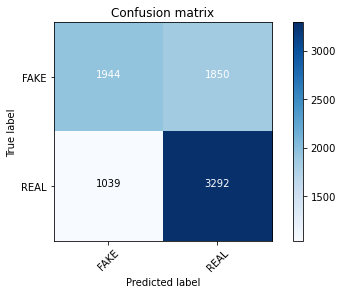

In [28]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.6444307692307693

# Passive Aggressive Classifier Algorithm

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

accuracy:   0.693
Confusion matrix, without normalization


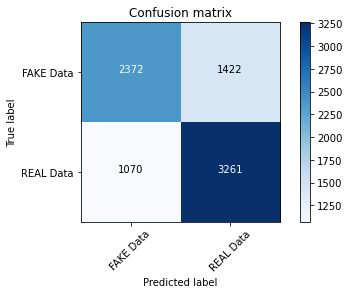

In [33]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Multinomial Classifier with Hyperparameter

In [34]:
classifier=MultinomialNB(alpha=0.1)

In [35]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\utkar\anaconda3\lib\site-packages\sklearn\naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Alpha: 0.0, Score : 0.6270769230769231
Alpha: 0.1, Score : 0.6299076923076923
Alpha: 0.2, Score : 0.6316307692307692
Alpha: 0.30000000000000004, Score : 0.6331076923076923
Alpha: 0.4, Score : 0.6333538461538462
Alpha: 0.5, Score : 0.6347076923076923
Alpha: 0.6000000000000001, Score : 0.6359384615384616
Alpha: 0.7000000000000001, Score : 0.6376615384615385
Alpha: 0.8, Score : 0.6393846153846154
Alpha: 0.9, Score : 0.6412307692307693


In [41]:
## Get Features names
feature_names = vect.get_feature_names()

In [42]:
classifier.coef_[0]

array([-12.19686595, -11.44965155, -12.19686595, ..., -11.44965155,
       -11.44965155,  -9.45961659])

In [43]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-3.9635398941678357, 'people'),
 (-4.414151321863157, 'women'),
 (-4.4635229696197465, 'black'),
 (-4.662043939721231, 'like'),
 (-4.90090476002318, 'fucking'),
 (-5.040602645364949, 'white'),
 (-5.044075172510952, 'love'),
 (-5.067835529987078, 'would'),
 (-5.090350890324884, 'think'),
 (-5.214312460166074, 'want'),
 (-5.298151414893409, 'get'),
 (-5.388440027239397, 'one'),
 (-5.414547924834503, 'men'),
 (-5.433622765639668, 'country'),
 (-5.499968885177403, 'everyone'),
 (-5.559316712345735, 'muslims'),
 (-5.6039736336671435, 'know'),
 (-5.652314819634915, 'really'),
 (-5.754856709234354, 'woman'),
 (-5.820706055493637, 'many')]

In [44]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-12.196865949223398, 'aaaaghh'),
 (-12.196865949223398, 'aand'),
 (-12.196865949223398, 'aasshahajsjs'),
 (-12.196865949223398, 'abhorance'),
 (-12.196865949223398, 'ableism'),
 (-12.196865949223398, 'ablution'),
 (-12.196865949223398, 'aboard'),
 (-12.196865949223398, 'abolition'),
 (-12.196865949223398, 'abolitionists'),
 (-12.196865949223398, 'abominations'),
 (-12.196865949223398, 'aboslutely'),
 (-12.196865949223398, 'abou'),
 (-12.196865949223398, 'abougt'),
 (-12.196865949223398, 'abso'),
 (-12.196865949223398, 'absorbed'),
 (-12.196865949223398, 'abubakari'),
 (-12.196865949223398, 'academically'),
 (-12.196865949223398, 'accceptable'),
 (-12.196865949223398, 'accelerationist'),
 (-12.196865949223398, 'acceptng'),
 (-12.196865949223398, 'accessible'),
 (-12.196865949223398, 'accidents'),
 (-12.196865949223398, 'accomplishment'),
 (-12.196865949223398, 'accord'),
 (-12.196865949223398, 'accountant'),
 (-12.196865949223398, 'accountants'),
 (-12.196865949223398, 'accounted'),
 